<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

## Importing the libraries

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## Load and Prepare Data

In [78]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

data = pd.concat([train_data, test_data], ignore_index=True)

data["datetime"] = pd.to_datetime(data["datetime"])

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [79]:
data["hour"] = data["datetime"].dt.hour
data["dayofweek"] = data['datetime'].dt.dayofweek
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year
data["day"] = data["datetime"].dt.day
data["quarter"] = data["datetime"].dt.quarter

data["is_weekend"] = (data["dayofweek"] >= 5).astype(int)

data.drop("datetime", axis=1, inplace=True)

data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,year,day,quarter,is_weekend
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,0,5,1,2011,1,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,5,1,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2,5,1,2011,1,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,3,5,1,2011,1,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,4,5,1,2011,1,1,1


## EDA

In [80]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour',
       'dayofweek', 'month', 'year', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       10886 non-null  float64
 11  hour        17379 non-null  int64  
 12  dayofweek   17379 non-null  int64  
 13  month       17379 non-null  int64  
 14  year        17379 non-null  int64  
 15  day         17379 non-null  int64  
 16  quarter     17379 non-null  int64  
 17  is_weekend  17379 non-null  int32  
dtypes: float64(6), int32(1), int64(11)
memory usage: 2.3 MB


In [82]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,year,day,quarter,is_weekend
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132,11.546752,3.011451,6.537775,2011.502561,15.683411,2.512055,0.288509
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454,6.914405,2.001966,3.438776,0.500008,8.789373,1.114108,0.453082
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,4.000000,2011.000000,8.000000,2.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,7.000000,2012.000000,16.000000,3.000000,0.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,10.000000,2012.000000,23.000000,4.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,12.000000,2012.000000,31.000000,4.000000,1.000000


In [83]:
data.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
hour             0
dayofweek        0
month            0
year             0
day              0
quarter          0
is_weekend       0
dtype: int64

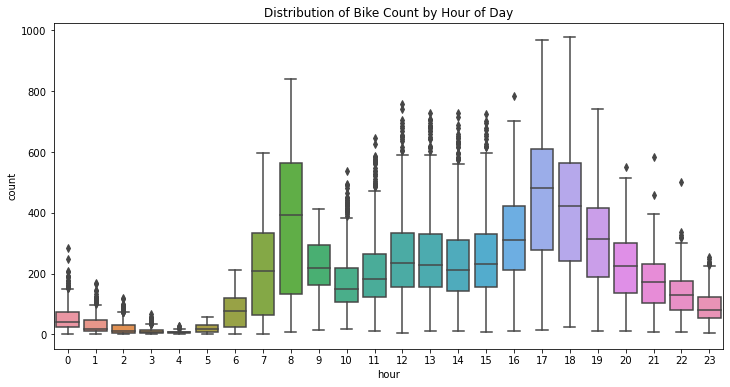

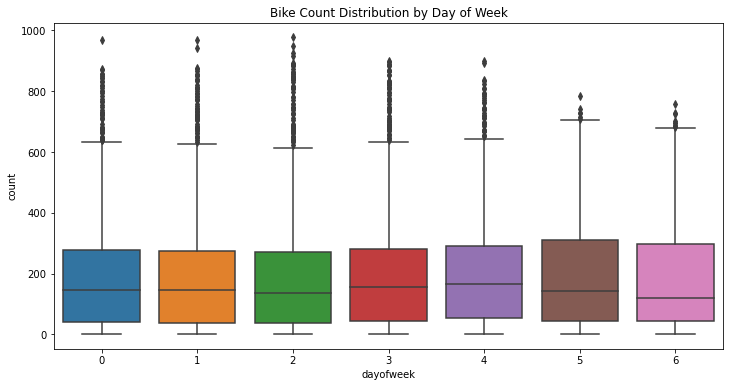

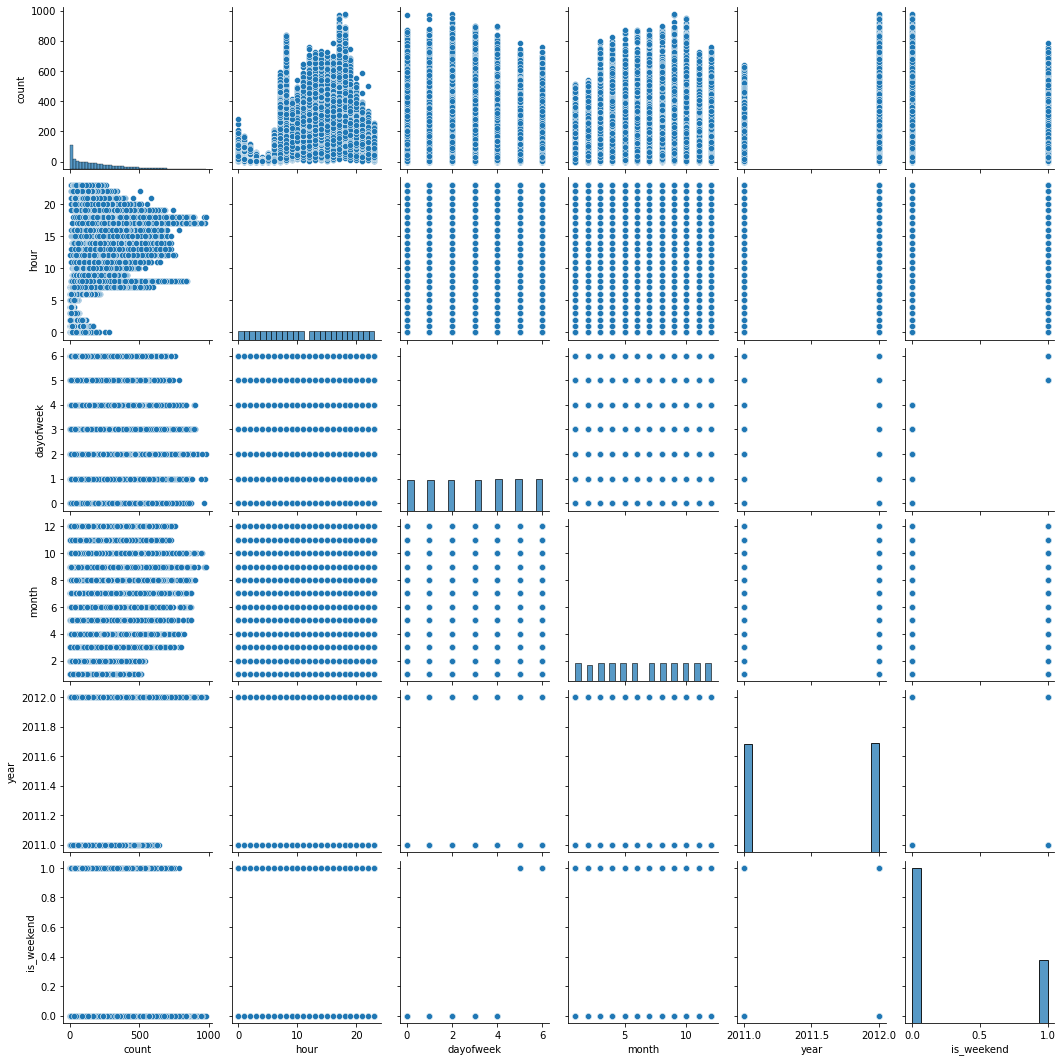

In [84]:
# Visualizing bike demand distribution by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='count', data=data)
plt.title('Distribution of Bike Count by Hour of Day')
plt.show()

# Relationship between days of the week and demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='count', data=data)
plt.title('Bike Count Distribution by Day of Week')
plt.show()

# Scatter plot matrix between bike counts and numerical features
sns.pairplot(data[['count', 'hour', 'dayofweek', 'month', 'year', 'is_weekend']])
plt.show()


## Data Preprocessing

In [86]:
# تعریف ویژگی‌ها و هدف
X = data.drop('count', axis=1)  # ویژگی‌ها
y = data['count']               # هدف

# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [87]:
# بررسی وجود مقادیر NaN در داده های X_train
print(X_train.isnull().sum())

# بررسی وجود مقادیر NaN در داده های y_train
print(y_train.isnull().sum())

# حذف سطرهایی که شامل مقادیر NaN هستند
X_train = X_train.dropna()
y_train = y_train.dropna()

# یا جایگزینی مقادیر NaN با میانگین ستون
# X_train = X_train.fillna(X_train.mean())
# y_train = y_train.fillna(y_train.mean())


season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        5203
registered    5203
hour             0
dayofweek        0
month            0
year             0
day              0
quarter          0
is_weekend       0
dtype: int64
5203


In [88]:
# بررسی نوع داده ستون های X_train
print(X_train.dtypes)

# تبدیل ستون ها به نوع داده عددی در صورت نیاز
# X_train['column_name'] = pd.to_numeric(X_train['column_name'], errors='coerce')


season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
hour            int64
dayofweek       int64
month           int64
year            int64
day             int64
quarter         int64
is_weekend      int32
dtype: object


In [89]:
# بررسی شکل داده ها
print(X_train.shape)
print(y_train.shape)

# در صورتی که تعداد سطرها در X_train و y_train برابر نیست، سطرهای اضافی را حذف کنید
if X_train.shape[0] != y_train.shape[0]:
    print("تعداد سطرها در X_train و y_train برابر نیست!")
    # پیاده سازی کد حذف سطرهای اضافی


(8700, 17)
(8700,)


In [90]:
# بررسی ستون های غیر عددی
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

# حذف ستون های غیر عددی
# X_train = X_train.drop(non_numeric_columns, axis=1)

# یا تبدیل ستون های غیر عددی به عددی با استفاده از one-hot encoding
# X_train = pd.get_dummies(X_train, columns=non_numeric_columns)


Index([], dtype='object')


In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# بارگیری داده‌ها
data = pd.read_csv('train.csv')  # یا هر فایل دیگری که استفاده می‌کنید

# استخراج ویژگی‌ها
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek
data.drop('datetime', axis=1, inplace=True)

# تعریف ویژگی‌ها و هدف
X = data.drop(['count', 'casual', 'registered'], axis=1, errors='ignore')
y = data['count']

# بررسی مقادیر NaN
print("مقادیر NaN در X:")
print(X.isnull().sum())
print("مقادیر NaN در y:")
print(y.isnull().sum())

# حذف مقادیر NaN
X = X.dropna()
y = y.dropna()

# بررسی نوع داده‌ها
print("نوع داده‌های X:")
print(X.dtypes)

# تبدیل نوع داده‌ها به عددی در صورت لزوم
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col])
        except ValueError:
            print(f"ستون {col} قابل تبدیل به نوع عددی نیست. این ستون حذف خواهد شد.")
            X = X.drop(col, axis=1)

# تقسیم داده‌ها به آموزش و آزمایش
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد و آموزش مدل رگرسیون خطی
lr = LinearRegression()
lr.fit(X_train, y_train)

print("مدل با موفقیت آموزش داده شد.")


مقادیر NaN در X:
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
hour          0
dayofweek     0
dtype: int64
مقادیر NaN در y:
0
نوع داده‌های X:
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int64
dayofweek       int64
dtype: object
مدل با موفقیت آموزش داده شد.


## Strorytelling - Visualization

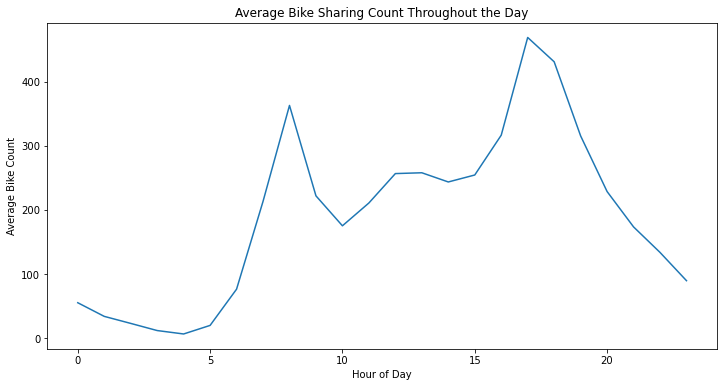

In [92]:
hourly_mean = data.groupby('hour')['count'].mean()

plt.figure(figsize=(12,6))
hourly_mean.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Average Bike Count')
plt.title('Average Bike Sharing Count Throughout the Day')
plt.show()

## Train your model (Regression)

In [93]:
# مدل رگرسیون خطی
lr = LinearRegression()

# آموزش مدل
lr.fit(X_train, y_train)


LinearRegression()

## Test Result

In [97]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

plr = LinearRegression()
plr.fit(X_train_poly, y_train)


LinearRegression()

In [98]:
# Linear Regression Model Evaluation
y_pred_lr = lr.predict(X_test)

# Polynomial Regression Model Evaluation
y_pred_plr = plr.predict(X_test_poly)

if y_test is not None:
    # Linear Regression Metrics
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    r2_lr = r2_score(y_test, y_pred_lr)

    # Polynomial Regression Metrics
    rmse_plr = np.sqrt(mean_squared_error(y_test, y_pred_plr))
    r2_plr = r2_score(y_test, y_pred_plr)

    print("Linear Regression:")
    print(f'RMSE: {rmse_lr:.2f}')
    print(f'R-squared: {r2_lr:.2f}')

    print("\nPolynomial Regression:")
    print(f'RMSE: {rmse_plr:.2f}')
    print(f'R-squared: {r2_plr:.2f}')


Linear Regression:
RMSE: 147.38
R-squared: 0.34

Polynomial Regression:
RMSE: 129.40
R-squared: 0.49


In [99]:
# Linear Regression Model Evaluation
y_pred_lr = lr.predict(X_test)

# Polynomial Regression Model Evaluation
y_pred_plr = plr.predict(X_test_poly)

if y_test is not None:
    # Calculate evaluation metrics
    def evaluate_model(y_true, y_pred, model_name):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        print(f'{model_name}:')
        print(f'MAE: {mae:.2f}')
        print(f'MSE: {mse:.2f}')
        print(f'RMSE: {rmse:.2f}')
        print(f'R-squared: {r2:.2f}')
        print('\n')

    # Evaluate Linear Regression
    evaluate_model(y_test, y_pred_lr, 'Linear Regression')

    # Evaluate Polynomial Regression
    evaluate_model(y_test, y_pred_plr, 'Polynomial Regression')


Linear Regression:
MAE: 107.78
MSE: 21720.68
RMSE: 147.38
R-squared: 0.34


Polynomial Regression:
MAE: 95.16
MSE: 16743.95
RMSE: 129.40
R-squared: 0.49




## Send us the Result (Maktabkhoone)

In [100]:
# Save predicted results to a CSV file
if y_test is not None:
    results = pd.DataFrame({
        'Actual': y_test,
        'Predicted_Linear': y_pred_lr,
        'Predicted_Polynomial': y_pred_plr
    })
    results.to_csv('bike_sharing_predictions.csv', index=False)

    print("Results saved to 'bike_sharing_predictions.csv'")


Results saved to 'bike_sharing_predictions.csv'


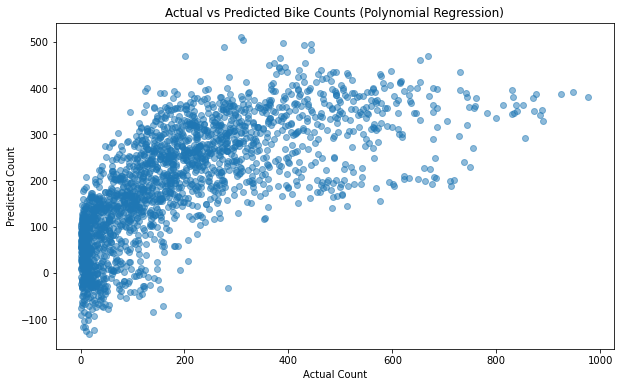

In [101]:
if y_test is not None:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_plr, alpha=0.5)
    plt.xlabel('Actual Count')
    plt.ylabel('Predicted Count')
    plt.title('Actual vs Predicted Bike Counts (Polynomial Regression)')
    plt.show()
